# Linear Regression (One Feature and m Training Examples)

## Hypothesis
We will use $\mathbf{𝐱_𝐢}$  to denote the feature vector and  $\mathbf{𝐲_𝐢}$  to denote output variable for $\mathbf{i^{th}}$ training example.  

$h(x)=wx^{(i)}+b$  

Let us have $m$ training example then  $𝐢=1,2,3,...m$ and in the present case, we have $m=8$  

Let us write $\hat{y}$ for the prediction from the hypothesis.

$\hat{y}^{(i)} = wx^{(i)}+b $  

In [1]:
import numpy as np
from matplotlib import pyplot as plt
price=np.array([20,28, 39, 51, 75, 130, 210,400])
bedroom=np.array([1,1,2,2,3,4,4,5])
size=np.array([100,150,200,250,500, 1000,2500,5000])
print(price,bedroom,size)

[ 20  28  39  51  75 130 210 400] [1 1 2 2 3 4 4 5] [ 100  150  200  250  500 1000 2500 5000]



Let us substitute the data  


$\hat{y}^{(1)} = wx^{(1)}+b = w(100)+b $      `First Training Example`   
$\hat{y}^{(2)} = wx^{(2)}+b = w(150)+b $      `Second Training Example`  
.   
.  
$\hat{y}^{(8)} = wx^{(8)}+b = w(5000)+b $     `Eighth Training Example`


## Cost Function  
$J(w,b)=\frac{1}{2m}\sum \limits _{i=1} ^{m} (\hat{y}-y)^{2} $  
$J(w,b)=\frac{1}{2m}\sum \limits _{i=1} ^{m} ((wx^{(i)}+b)-y)^{2} $  

Start with sum assumed value of $w$ and $b$ and evaluate $J(w,b)$  

$J(w,b)=\frac{1}{2m}[(100w+b-20)^2+(150w+b-28)^2+....+(5000w+b-40)^2]$  

**Our aim is to minimize the cost function,** $J(w,b)$   

Let us drop $b$ to simplify our expression to visulize the plot of cost function in 2D i.e. cost as a function of weight only.

In [2]:
def cost(x,y,w,b):
  yhat=w*x+b
  J=np.dot((yhat-y).T,(yhat-y))
  return J/2*x.shape[0] # x.shape[0] is equal to m

In [3]:
X=size
y=price

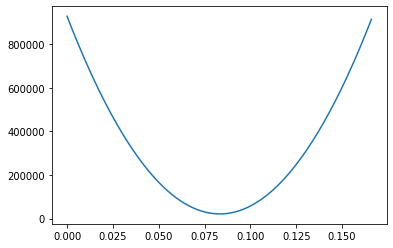

In [4]:
#initialize array to store J for plotting
plotJ=np.array([0,0])
for i in range(167):
  J=cost(X, y, i/1000,0)    # Call cost function to _ and the cost for assumed weight (i/1000)
  plotJ=np.vstack((plotJ,[i/1000,J])) # Stack the value of the w and the cost in plotJ array
  #print(i/100,y,J)
plotJ
plt.plot(plotJ[1:,0], plotJ[1:,1])

In [5]:
# Minimum Loss and its corresponding weight
minLoss=np.min(plotJ[1:,1])
print(minLoss, np.where(plotJ[1:,1] == minLoss))

21432.059999999998 (array([83]),)


### Gradient Descent
$ \frac{\partial J}{\partial w} = \frac{1}{m} \sum \limits _{i=1} ^m (\hat {y}^{(i)}-y^{(i)})x$  

$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum \limits _{i=1} ^m (\hat {y}^{(i)}-y^{(i)})$  

**Substituting**   

$ \frac{\partial J}{\partial w} = \frac{1}{m}[(100w+b-20) (100) +(150w+b-28) (150) +....+(5000w+b-40) (5000)]$  

$ \frac{\partial J}{\partial b} = \frac{1}{m}[(100w+b-20) +(150w+b-28) +....+(5000w+b-40) ]$  

**Updating Parameters**  

$ w = w - \alpha \frac {\partial J}{\partial w}$  

$ b = b - \alpha \frac {\partial J}{\partial b}$  

Where,  
        $ \alpha$ : Learning Rate (0.0001, 0.001, 0.01...)

In [6]:
X=X/np.max(X)

In [7]:
learning_rate=0.001
max_iteration=100
cost=np.zeros((max_iteration))
wPlot=np.zeros((max_iteration))
bPlot=np.zeros((max_iteration))
print(X)
w=0.0
b=0.0
for i in range(max_iteration):
  yhat=w*X+b
  cost[i]=np.dot((yhat-y).T,(yhat-y))/2*X.shape[0]
  dw=np.dot((yhat-y).T,X)/X[0]
  db=np.sum((yhat-y), axis=0)/X[0]
  w=w-learning_rate*dw
  b=b-learning_rate*db
  wPlot[i]=w
  bPlot[i]=b
print(w, b)

[0.02 0.03 0.04 0.05 0.1  0.2  0.5  1.  ]
368.2903162871595 29.980022348465873


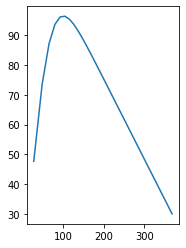

In [8]:
ax1=plt.subplot(121)
ax1.plot(wPlot,bPlot)

In [9]:
plt.rcParams['figure.figsize']=(16,10)

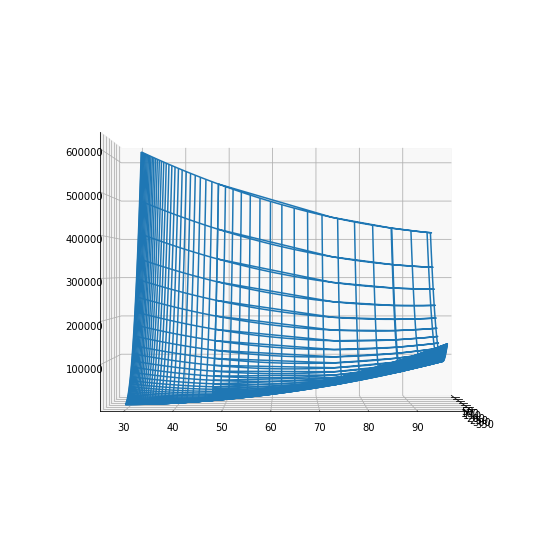

In [10]:
xPoint,yPoint=np.meshgrid(wPlot,bPlot)
zPoint=np.zeros(xPoint.shape[0]*yPoint.shape[0]).reshape(xPoint.shape[0], yPoint.shape[0])
for i in range(xPoint.shape[0]):
  for j in range(yPoint.shape[0]):
    yhat=xPoint[i][j]*X+yPoint[i][j]
    J=np.dot((yhat-y).T,(yhat-y))
    zPoint[i][j]=J/2*X.shape[0] # x.sha
ax2=plt.axes(projection="3d")
ax2.plot_wireframe(xPoint,yPoint,zPoint)
ax2.view_init(0,0)

In [11]:
def predict(w,b,x):
  return w*x+b

In [12]:
predict(w,b,0.8)

324.6122753781935

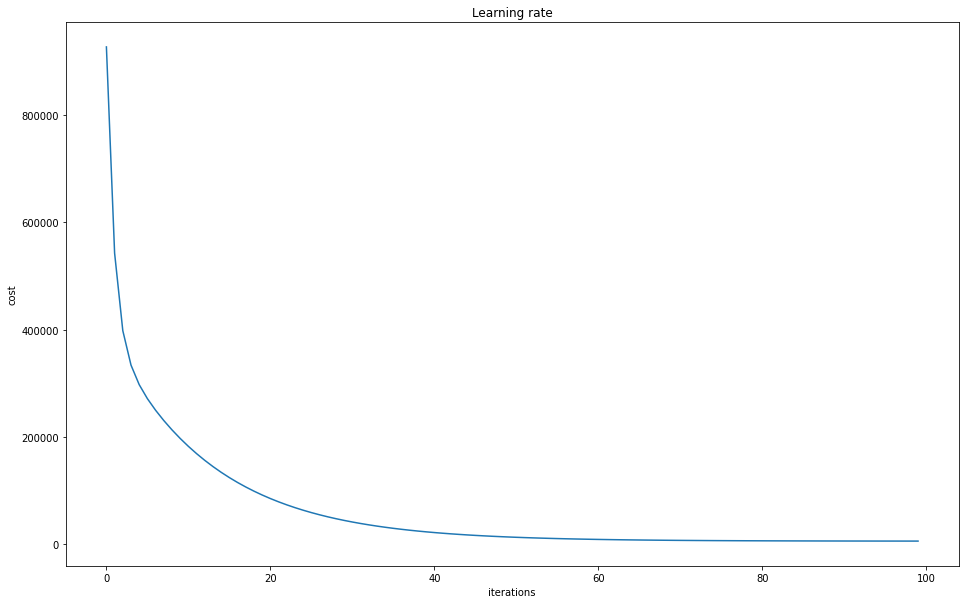

In [13]:
# Plot learning curve (with costs)
plt.plot(cost)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("Learning rate")
plt.show()

 
374.6 x + 28.29


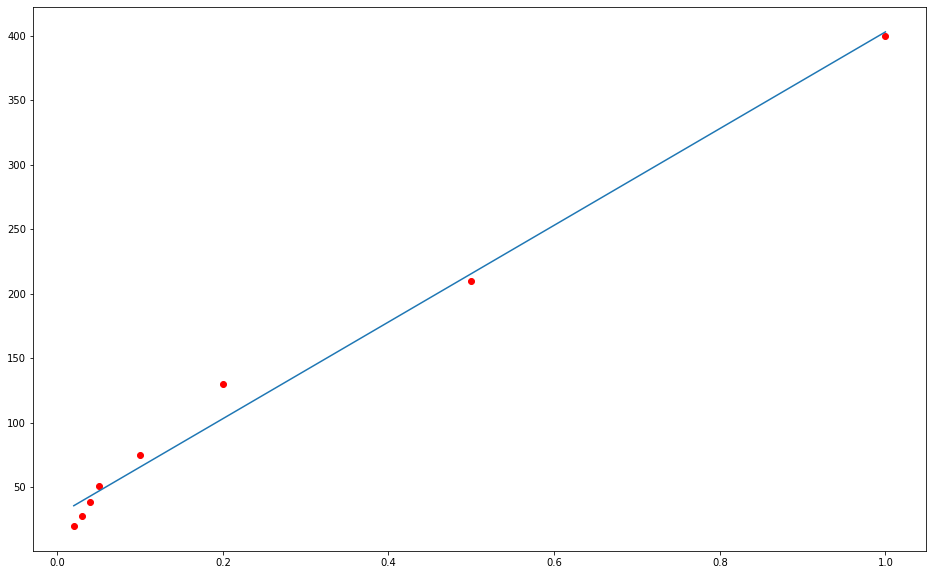

In [14]:
# Using Matplotlib function for linear fiiting
plt.scatter(X,y,color="red")
linear_model=np.polyfit(X,y,1)
hypothesis =np.poly1d(linear_model)
print(hypothesis)
plt.plot(X,hypothesis(X))
plt.show()

In [15]:

from sklearn import linear_model
X=np.array([[100],[150],[200],[250],[500], [1000],[2500],[5000]])
# X=np.array([[1],[1],[2],[2],[3], [4],[4],[5]])
y=np.array([20,28, 39, 51, 75, 130, 210, 400])


In [16]:
print(X.shape, type(X), y.shape, type(y))
# print(X, y)

(8, 1) <class 'numpy.ndarray'> (8,) <class 'numpy.ndarray'>


In [17]:
# Create a Logistic Regression Object, perform Logistic Regression
lr = linear_model.LinearRegression()
lr.fit(X, y)

LinearRegression()

In [18]:
print(lr.coef_)
print(lr.intercept_)

[0.07491407]
28.291694113419965


<font color="blue">The difference in the slope(weight) is due the Normalization.</font>